### Structural Breaks

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from FinancialMachineLearning.regime_change.supremum_adf import *
from FinancialMachineLearning.regime_change.cusum_test import *
from FinancialMachineLearning.regime_change.chow_type import *

In [2]:
start_date = '2000-01-01'
end_date = '2024-01-29'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000


#### CUSUM Test

<Axes: xlabel='Date'>

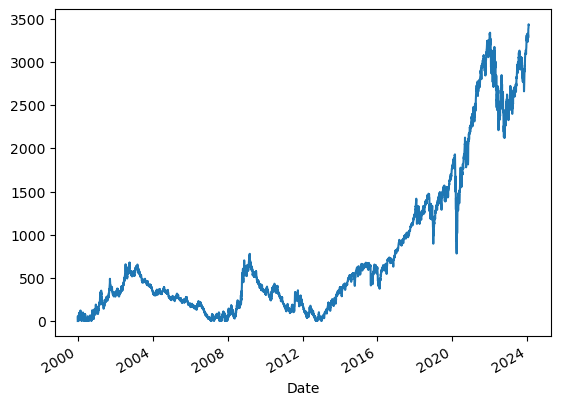

In [3]:
get_values_diff(
    test_type = 'two_sided',
    series = data['Close'],
    index = data.index,
    ind = data.index[0]
).plot(grid = False)

In [4]:
chu_stinchcombe = get_chu_stinchcombe_white_statistics(
    series = np.log(data['Close']), 
    test_type = 'two_sided',
    num_threads = 8
)

2024-01-29 17:35:18.382735 100.0% get_s_n_for_t done after 3.86 minutes. Remaining 0.0 minutes.


<Axes: title={'center': 'Chu-Stinchcombe White Statistics'}, xlabel='Date'>

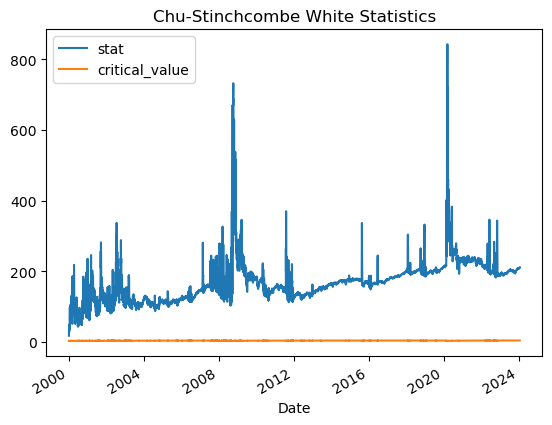

In [5]:
import matplotlib.pyplot as plt

chu_stinchcombe.plot(grid = False, title = 'Chu-Stinchcombe White Statistics')

#### Explosiveness Test

In [6]:
chow = chow_type_stat(
    series = np.log(data['Close']), 
    min_length = 20, 
    num_threads = 8
)

2024-01-29 17:35:25.281683 100.0% chow_type_adf done after 0.1 minutes. Remaining 0.0 minutes..


<Axes: title={'center': 'Chow Type Dickey Fuller Statistics'}, xlabel='Date'>

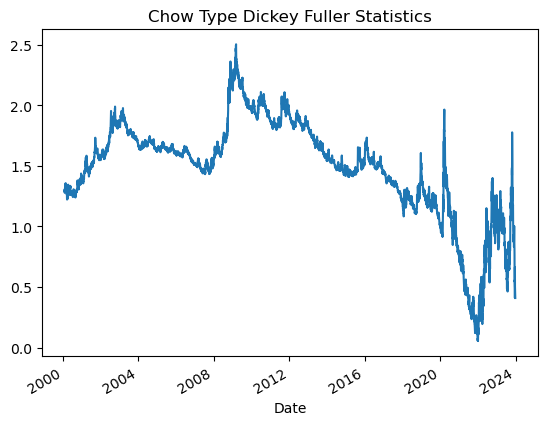

In [7]:
chow.plot(grid = False, title = 'Chow Type Dickey Fuller Statistics')

In [8]:
sadf = get_sadf(
    series = np.log(data['Close']), 
    model = 'linear', 
    lags = 3, 
    min_length = 100, 
    add_const = True,
    num_threads = 8
)

2024-01-29 18:52:23.244272 100.0% sadf_outer_loop done after 76.95 minutes. Remaining 0.0 minutes..


<Axes: title={'center': 'Supremum Augmented Dickey Fuller Statistics'}, xlabel='Date'>

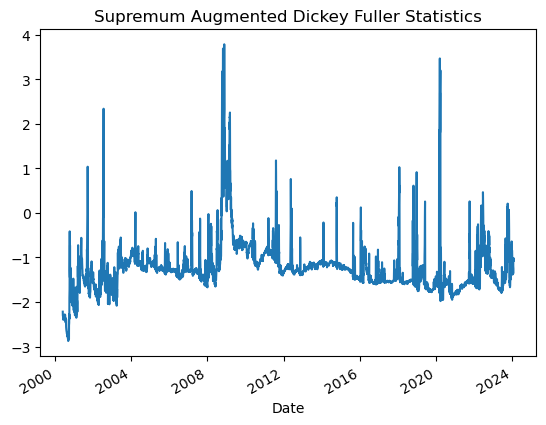

In [11]:
sadf.plot(grid = False, title = 'Supremum Augmented Dickey Fuller Statistics')

Text(0.5, 1.0, 'close prices and SADF statistics')

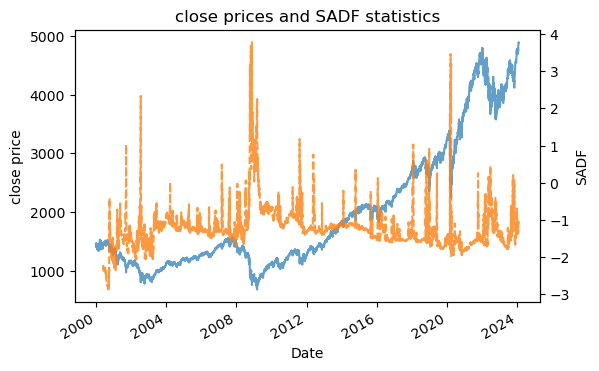

In [18]:
data.Close.plot(figsize = (6, 4), label = 'Original Data', alpha = 0.7)
plt.ylabel('close price')
sadf.plot(grid = False, label = 'SADF statistics', secondary_y = True, ls = '--', alpha = 0.8)
plt.ylabel('SADF')
plt.title('close prices and SADF statistics')